# Machine Learning FTE - 35306


Professor: Ricardo Torres -- ricardo.dasilvatorres@wur.nl

Chapter 05 - Sampling Methods - Exercise 9


In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneOut 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm  

%matplotlib inline

## 9. We will now consider the `Boston` housing data set, from the MASS library.

(a) Based on this data set, provide an estimate for the population
mean of `medv`. Call this estimate $\hat{\mu}$.

In [4]:
boston = pd.read_csv("../data/islr_data/Boston.csv", index_col=0)

In [6]:
np.mean(boston.medv)

22.532806324110677

(b) Provide an estimate of the standard error of $\hat{\mu}$. Interpret this
result.

*Hint: We can compute the standard error of the sample mean by
dividing the sample standard deviation by the square root of the
number of observations.*

In [103]:
stde = lambda data: np.std(data) / np.sqrt(len(data))

(c) Now estimate the standard error of $\hat{\mu}$ using the bootstrap. How
does this compare to your answer from (b)?

In [136]:
def bootstrap(data, n_iter, col, func):
    values = []
    for n in range(n_iter):
        draw = np.random.choice(data.shape[0], data.shape[0], replace=True)
        err  = func(data[col].iloc[draw], q=0.1)
        values.append(err)
    return values

<Axes: ylabel='Count'>

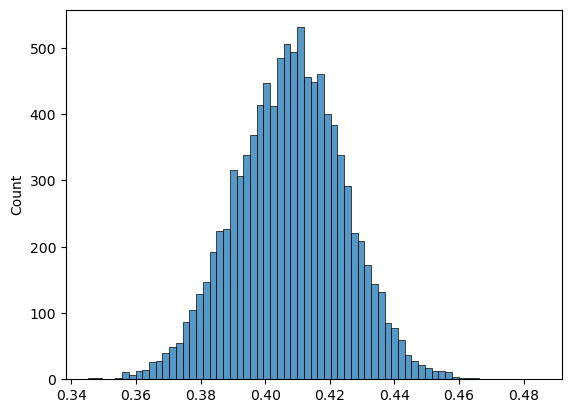

In [108]:
import seaborn as sns
b_values = bootstrap(boston, 10000, "medv", stde)
sns.histplot(b_values)

(d) Based on your bootstrap estimate from (c), provide a 95 % confidence interval for the mean of `medv`. Compare it to the results obtained using t statistics.

*Hint: You can approximate a 95 % confidence interval using the
formula $[\hat{\mu} − 2SE(\hat{\mu}), \hat{\mu} + 2SE(\hat{\mu})]$.*

In [109]:
def conf_int (mu, se_values):
    se = np.mean(b_values)
    x1, x2 = mu - 2*se, mu + 2*se
    return x1, x2

In [110]:
conf_int(22.5, b_values)

(21.68471140015888, 23.31528859984112)

(e) Based on this data set, provide an estimate, $\hat{\mu}_{med}$, for the median
value of `medv` in the population.

In [111]:
np.median(boston.medv)

21.2

(f) We now would like to estimate the standard error of $\hat{\mu}_{med}$. Unfortunately, there is no simple formula for computing the standard error of the median. Instead, estimate the standard error of the median using the bootstrap. Comment on your findings.

In [112]:
median_vals = bootstrap(boston, 10000, "medv", np.median)

<Axes: ylabel='Count'>

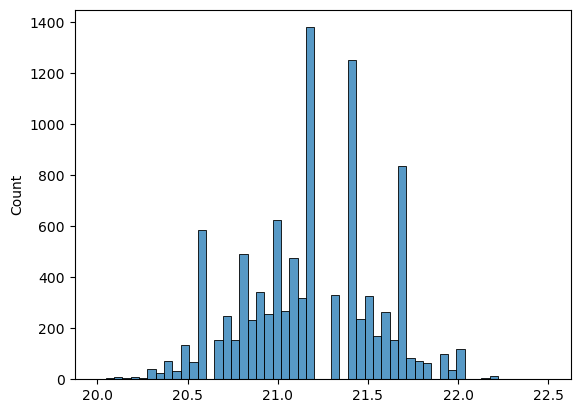

In [113]:
sns.histplot(median_vals)

In [114]:
stde(median_vals)

0.003783559803941254

(g) Based on this data set, provide an estimate for the tenth percentile of `medv` in Boston census tracts. Call this quantity $\hat{\mu}_{0.1}$.

In [132]:
boston.medv.quantile(0.1)

12.75

(h) Use the bootstrap to estimate the standard error of $\hat{\mu}_{0.1}$. Comment on your findings.

In [140]:
quant = bootstrap(boston, 10000, "medv", np.quantile)

<Axes: ylabel='Count'>

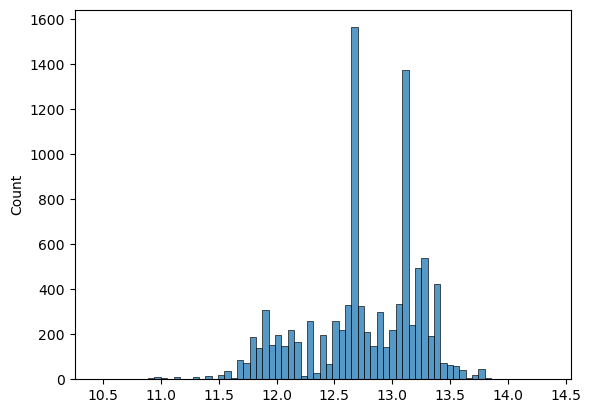

In [141]:
sns.histplot(quant)

In [143]:
boston.medv.describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: medv, dtype: float64